# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [25]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')  # importing 2017 SAT data as sat_2017
act_2017 = pd.read_csv('../data/act_2017.csv')  # importing 2017 ACT data as act_2017

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [26]:
sat_2017.head(10)   # displaying first 10 rows of notebook

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [27]:
act_2017.head(10) # displaying first 10 rows of notebook

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**
We are looking at two sets of data.  The first is a set of data related to various SAT metrics for all 50 states as well as Washington D.C. for the 2017 high school graduating class.  Each row includes the state in question, the percentage of the 2017 graduating class that took the SAT, an Evidenced Based Reading and Writing Score score (out of 800), a Math score (also out of 800), and the total score which represents the sum of the Reading & Writing and the Math scores (out of 1600).  This does not include data for the national average

The second set is related to various ACT metrics for all 50 states as well as the nation as a whole for the 2017 high school graduation class. Each row includes either D.C., the U.S., or the state in question, the percentage of the 2017 high school graduating class that took the test, a score (out of 36) for each subject (English, Math, Reading, and Science), and then a composite score out of 36 that represents the mean of the four subject scores.  


#### 4a. Does the data look complete? 

In [28]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [29]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

Answer:  The data is complete as there are no null values

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:  There are obvious errors in each data set related to the state of Maryland.  In the ACT data, Maryland's average science score is stated as 2.3, when it should be 23.2 (the last digit was cut off).  Additionally on the SAT scores, Maryland's average math score is listed as 52 when it should be 524. I have confirmed that the rest of Maryland's data is correct.

Additionally, Wyoming's ACT composite score has an "X" at the end, which needs to be eliminated.

Particularly with regards to the Maryland issue, we are able to find these errors by combining the data with our knowledge of maximum and minimum SAT/ACT scores.  On the SAT, the minimum score for a section is 200 and the maximum is 800, meaning that the range for total score is 400 to 1600.  On the ACT, the minimum score for a section is 1.0 and the maximum is 36.0; the composite score is an average of the four section scores, so this range remains in place for the composite score. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [30]:
# The following code fixes the error with Maryland's SAT Math score

sat_2017.loc[sat_2017['State'] == 'Maryland', ['Math']] = 524
sat_2017[sat_2017['State'] == 'Maryland']['Math']

20    524
Name: Math, dtype: int64

In [31]:
# The following code fixes the error with Maryland's ACT Science score

act_2017.loc[act_2017['State'] == 'Maryland', ['Science']] = 23.2
act_2017[act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [32]:
# The following code fixes the error with Wyoming's ACT Composite score

act_2017.loc[act_2017['State'] == 'Wyoming', ['Composite']] = 20.2
act_2017[act_2017['State'] == 'Wyoming']['Composite']

51    20.2
Name: Composite, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [33]:
# ACT data types
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [34]:
# SAT data types
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:  There are some odd datatypes contained within the dataframes that will need to be fixed.  ACT Participation is listed as an object (due to the % sign) but should be converted into a float.  ACT Composite is currently an object as a result of Wyoming's Composite score having an X on the end - the X has already been removed, but we need to convert these strings to floats.  Finally, we must also update the SAT Participation to a float due to the same % sign issue we were having with the ACT data.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [35]:
# The following code is a function to change all percentages in the participation column to floats.

def percentage_to_float(cell):
    cell = cell.replace('%', '')
    return float(cell)

In [36]:
# This code converts the participation rates in the SAT data to floats

sat_2017['Participation'] = sat_2017['Participation'].map(percentage_to_float)

In [37]:
act_2017['Participation'] = act_2017['Participation'].map(percentage_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [38]:
# The X in Wyoming ACT compostie was already removed, but confirming below.
act_2017[act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [39]:
# The following code converts ACT composite scores into floats

act_2017['Composite'] = act_2017['Composite'].map(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [40]:
#code

- Display the data types again to confirm they are correct.

In [41]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [42]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

Both the SAT and ACT data are reflecting the correct data types.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [43]:
# The below code creates new column names for the SAT data

new_sat_2017_columns = {'State' : 'state',
                        'Participation' : '2017_sat_participation',
                       'Evidence-Based Reading and Writing' : '2017_sat_reading_and_writing',
                       'Math' : '2017_sat_math',
                       'Total' : '2017_sat_total'}

sat_2017.rename(columns = new_sat_2017_columns, inplace = True)

In [44]:
# The below code creates new column names for the ACT data

new_act_2017_columns = {'State': 'state', 
                        'Participation' : '2017_act_participation',
                       'English' : '2017_act_english',
                       'Math' : '2017_act_math',
                       'Reading' : '2017_act_reading',
                       'Science' : '2017_act_science',
                       'Composite' : '2017_act_composite'}

act_2017.rename(columns = new_act_2017_columns, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State**|*string*|ACT and SAT|The state or Washington D.C. in question| 
|**2017 SAT Participation**|*float*|SAT|The percent of students in the 2017 graduating class that took the SAT|
|**2017 SAT Reading and Writing**|*float*|SAT|The average score on the SAT Reading & Writing section among students that took the test in a given state in 2017|
|**2017 SAT Math**|*float*|SAT|The average score on the SAT Math section among students that took the test in a given state in 2017|
|**2017 SAT Total**|*float*|SAT|The average total score on the SAT (Math + English & Reading) among students that took the test in a given state in 2017|
|**2018 SAT Participation**|*float*|SAT|The percent of students in the 2018 graduating class that took the SAT in a given state|
|**2018 SAT Reading and Writing**|*float*|SAT|The average score on the SAT Reading & Writing section among students that took the test in a given state in 2018|
|**2018 SAT Math**|*float*|SAT|The average score on the SAT Math section among students that took the test in a given state in 2018|
|**2018 SAT Total**|*float*|SAT|The average total score on the SAT (Math + English & Reading) among students that took the test in a given state in 2018|
|**2017 ACT Participation**|*float*|ACT|The percent of students in the 2017 graduating class that took the ACT in a given state|
|**2017 ACT English**|*float*|ACT|The average score on the ACT English section among students that took the test in a given state in 2017|
|**2017 ACT Math**|*float*|ACT|The average score on the ACT Math section among students that took the test in a given state in 2017|
|**2017 ACT Reading**|*float*|ACT|The average score on the ACT Reading section among students that took the test in a given state in 2017|
|**2017 ACT Science**|*float*|ACT|The average score on the ACT Science section among students that took the test in a given state in 2017|
|**2017 ACT Composite**|*float*|ACT|The average score on the ACT Composite, which represents an average of the four section scores, among students that took the test in a given state in 2017|
|**2018 ACT Participation**|*float*|ACT|The percent of students in the 2018 graduating class that took the ACT in a given state|
|**2018 ACT Composite**|*float*|ACT|The average score on the ACT Composite, which represents an average of the four section scores, among students that took the test in a given state in 2018|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [45]:
act_2017[act_2017['state'] == 'National']

,state,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [46]:
act_2017 = act_2017[act_2017['state'] != 'National']
act_2017.head()

,state,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [47]:
sat_2017.head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [48]:
#Code:


state_test_scores_2017 = pd.merge(left = sat_2017,
        right = act_2017,
        on = 'state')

In [49]:
state_test_scores_2017.head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [50]:
combined_2017 = state_test_scores_2017.to_csv(r'../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### Step 1: Importing 2018 Data

In [51]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')  # importing 2018 SAT data as sat_2018
act_2018 = pd.read_csv('../data/act_2018.csv')  # importing 2018 ACT data as act_2018

#### Step 2: Displaying 2018 Data

In [52]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [53]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


#### 3. Describing Data

We are looking at two sets of data.  The first is a set of data related to various SAT metrics for all 50 states as well as Washington D.C. for the 2018 high school graduating class.  Each row includes the state in question, the percentage of the 2018 graduating class that took the SAT, an Evidenced Based Reading and Writing Score score (out of 800), a Math score (also out of 800), and the total score which represents the sum of the Reading & Writing and the Math scores (out of 1600).  This does not include data for the national average

The second set is related to various ACT metrics for all 50 states for the 2018 high school graduation class. Each row includes either D.C. or the state in question as well  the percentage of the 2018 high school graduating class that took the test and a composite score out of 36 that is the average of the taker's four subject test scores (English, Math, Reading, and Science)

#### 4a. Does the data look complete? 

In [54]:
act_2018.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [55]:
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

As there are no null values in either data set, the data appears to be complete.

#### 4b. Are there any obvious issues with the observations?

Yes there appears to be one error with the data which is that Maine is repeated in the ACT data.  Additionally, in 2018, the 'Columbia' in District of Columbia is not capitalized, which will create an error when ultimately joining data frames

#### 4c. Fix any errors you identified

In [56]:
# The following code removes one of the instances of the Maine data

act_2018 = act_2018.drop(20, axis = 0)

In [57]:
# The following code fixes the District of Columbia capitalization in ACT 2018

act_2018.loc[act_2018['State'] == 'District of columbia', ['State']] = 'District of Columbia'

#### 5. What are your data types? 

In [58]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [59]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Similar to the 2017 data, we realize that we must convert Participation data into floats from objects.

#### 6. Fix Incorrect Data Types

In [60]:
# The following code is a function to change all percentages in the participation column to floats.

def percentage_to_float(cell):
    cell = cell.replace('%', '')
    return float(cell)

In [61]:
# The following code changes the SAT Participation data type to a float.

sat_2018['Participation'] = sat_2018['Participation'].map(percentage_to_float)

In [62]:
# The following code changes the ACT Participation data type to a float.

act_2018['Participation'] = act_2018['Participation'].map(percentage_to_float)

#### 7. Rename Columns

In [63]:
# The following code renames the SAT 2018 columns so that they are more readable and better use for manipulation.

new_sat_2018_columns = {'State' : 'state',
                        'Participation' : '2018_sat_participation',
                       'Evidence-Based Reading and Writing' : '2018_sat_reading_and_writing',
                       'Math' : '2018_sat_math',
                       'Total' : '2018_sat_total'}

sat_2018.rename(columns = new_sat_2018_columns, inplace = True)

In [64]:
# The following code renames the ACT 2018 columns so that they are more readable and better use for manipulation.

new_act_2018_columns = {'State' : 'state',
                        'Participation' : '2018_act_participation',
                       'Composite' : '2018_act_composite'}

act_2018.rename(columns = new_act_2018_columns, inplace = True)

#### 8. Create a data dictionary

Compiled above

#### 10. Merge dataframes

In [65]:
state_test_scores_2018 = pd.merge(left = sat_2018,
        right = act_2018,
        on = 'state')

In [66]:
state_test_scores_2018.head()

,state,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,6.0,595,571,1166,100.0,19.1
1,Alaska,43.0,562,544,1106,33.0,20.8
2,Arizona,29.0,577,572,1149,66.0,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4
4,California,60.0,540,536,1076,27.0,22.7


In [67]:
state_test_scores_2018.to_csv(r'../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [68]:
state_test_scores_2017_and_2018 = pd.merge(left = state_test_scores_2017,
                                          right = state_test_scores_2018,
                                          on = 'state')

state_test_scores_2017_and_2018.head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


In [69]:
final_csv = state_test_scores_2017_and_2018.to_csv(r'../data/final.csv')

In [70]:
final = state_test_scores_2017_and_2018

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [71]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
2017_sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
2017_sat_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
2017_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
2017_sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
2017_act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
2017_act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
2017_act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
2017_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
2017_act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
2017_act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [72]:
def get_standard_deviation(array):
    count = 0
    n = len(array)
    mu = np.mean(array)
    for result in array:
        count += ((result - mu)**2)
    return (count/n)**.5

In [73]:
get_standard_deviation(final['2018_sat_participation'])

36.946619223539415

In [74]:
final.head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [75]:
combined_frames_no_state = final.drop(columns = ['state'])

In [76]:
combined_frames_no_state.head()

,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


In [77]:
{column_head : get_standard_deviation(combined_frames_no_state[column_head]) for column_head in combined_frames_no_state }

{'2017_sat_participation': 34.92907076664508,
 '2017_sat_reading_and_writing': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 31.824175751231806,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_composite': 2.000786081581989,
 '2018_sat_participation': 36.946619223539415,
 '2018_sat_reading_and_writing': 47.03460978357609,
 '2018_sat_math': 47.30194550378352,
 '2018_sat_total': 93.22742384464433,
 '2018_act_participation': 33.70173582041031,
 '2018_act_composite': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:  They do match up with the numpy std method but not pandas.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [78]:
# This code examines the states with the highest SAT participation in 2017.
final.sort_values('2017_sat_participation', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1


In [79]:
# This code examines the states with the lowest SAT participation in 2017.
final.sort_values('2017_sat_participation').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633,629,1262,100.0,20.0
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4


#### Initial Findings on 2017 SAT Participation rate

100% of students in the 2017 graduating class in DC, Michigan, Connecticut, and Delaware took the SAT, with nearly 100% of the students in New Hampshire, Maine, and Idaho taking the test.  At first glance, there is not much linking these states together; for the most part they are Northern states with smaller populations but without looking at scores and state laws, it is hard to link these states together.

In looking at the states with the lowest 2017 SAT participation rate, we see states such as North Dakota, Mississippi, Iowa, Missouri, Utah, South Dakota, Nebraska, Wisconsin, Minnesota, Wyoming, and Arkansas.  At first glance, we notice that these states are all either Southern, Midwestern, or Great Plains states.

In [80]:
# This code examines the states with the highest SAT participation in 2018.
final.sort_values('2018_sat_participation', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3


In [81]:
# This code examines the states with the lowest SAT participation in 2018.
final.sort_values('2018_sat_participation').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2,3.0,633,625,1257,100.0,20.0
41,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,21.8,3.0,622,618,1240,77.0,21.9
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,623,1252,100.0,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5


In [82]:
final['2018_act_composite'].mean()

21.49607843137255

#### Initial Findings on 2018 SAT Participation

Amongst the states with the highest participation rates we see some states that we saw in the 2017 findings with Connecticut, Michigan, and Delaware all clocking 100% participation.  However, joinining these states at 100% is Colorado, an increase from 11% in 2017 - this leads me to think that there was a change in state laws following the 2017 SAT cycle.  Additionally, although participation remained high in DC at 93%, this is notable for no longer being 100%.  Additionally, Illinois significantly increased its SAT particiation rate from 9% to 99%.  

The list of states with low SAT participation in 2018 was essentially the same as 2017 with low participation across a number of Midwest and Great Plains states.


In [83]:
# This code examines the states with the highest ACT participation in 2017.
final.sort_values('2017_act_participation', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0,4.0,630,618,1248,100.0,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624,607,1231,100.0,19.6


In [84]:
# This code examines the states with the lowest ACT participation in 2017.
final.sort_values('2017_act_participation').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,23.7,70.0,547,539,1086,20.0,23.5


#### Initial Findings on 2017 ACT Participation

17 states had 100% participation on the 2017 ACT.  THese appear to largely be states across the Midwest and South, essentially the opposite type of states (at least geographically) compared to the states with low SAT participation.

Amongst states with the 10 lowest participation rates on the 2017 ACT, we see states largely in New England and the Northeast.  These states all had SAT participation above 60%.

In [85]:
# This code examines the states with the highest ACT participation in 2018.
final.sort_values('2018_act_participation', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0,4.0,630,618,1248,100.0,20.2
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,19.8,6.0,624,607,1231,100.0,19.6


In [86]:
# This code examines the states with the lowest ACT participation in 2018.
final.sort_values('2018_act_participation').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,97.0,513,505,1018,15.0,24.2
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
38,Pennsylvania,65.0,540,531,1071,23.0,23.4,23.4,24.2,23.3,23.7,70.0,547,539,1086,20.0,23.5


#### Initial Findings on 2018 ACT Participation

As in 2017, 17 states had 100% participation on the ACT in 2018, with Ohio and Nebraska replacing Minnesota and Colorado.  Once again, these states are concentrated in the Midwest and South.  

As for states with low ACT participation rates, we once again see states across the Northeast and states with high SAT participation rates

In [87]:
# This code examines the states with the highest average SAT total in 2017.
final.sort_values('2017_sat_total', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4,4.0,633,629,1262,100.0,20.0
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,4.0,633,631,1265,71.0,21.6


In [88]:
# This code examines the states with the lowest average SAT total in 2017.
final.sort_values('2017_sat_total').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0


#### Initial Findings on 2017 SAT Total Scores

For the most part, the states with the highest average SAT score are states in the Midwest with low SAT participation, which possibly makes sense (if its not common to take, only those who will perform well will take it).

Additionally, the states with the lowest average SAT scores tend to be those states with high SAT participaion (Oklahoma as an exception, this might be worth examining further).  

In [89]:
# This code examines the states with the highest average SAT total in 2018.
final.sort_values('2018_sat_total', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5,3.0,641,653,1294,100.0,20.5
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3,2.0,640,643,1283,98.0,20.3
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3.0,634,631,1265,68.0,21.8
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,4.0,633,631,1265,71.0,21.6


In [90]:
# This code examines the states with the lowest average SAT total in 2018.
final.sort_values('2018_sat_total').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
48,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.4,28.0,513,486,999,65.0,20.3
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3,4.0,480,530,1010,100.0,20.4


#### Initial Findings on 2018 SAT Total

Once again, we see states with low SAT participation rates leading the way in terms of highest average SAT total scores.  It is not until we see Massachusets pop up withthe 19th highest average SAT score do we see a state with high SAT participation.  The opposite is true for the most part on lowest average SAT total, although we note that West Virgina, Utah, Illinois, and Colorado all join the ranks of states with low participiationand low scores. 

In [91]:
# This code examines the states with the highest average ACT Composite in 2017.
final.sort_values('2017_act_composite', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,99.0,512,501,1013,7.0,24.0
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6


In [92]:
# This code examines the states with the lowest average ACT Composite in 2017.
final.sort_values('2017_act_composite').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1098,100.0,19.1


#### Initial Findings on 2017 ACT Composite

We see similar trends on the ACT as we do the SAT, with low participation states dominating the high scores and high participation states dominating the low scores.  States that (somewhat) buck the trend are Ohio and Iowa (higher score than we might imagine) and Arizona and New Mexico (somewhat lower score than we might imagine).


In [93]:
# This code examines the states with the highest average ACT Composite in 2018.
final.sort_values('2018_act_composite', ascending = False).head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,80.0,562,563,1125,25.0,25.5
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,96.0,535,528,1063,16.0,25.1
32,New York,67.0,528,523,1052,31.0,23.8,24.0,24.6,23.9,24.2,79.0,534,534,1068,27.0,24.5
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,100.0,511,499,1011,22.0,24.2


In [94]:
# This code examines the states with the lowest average ACT Composite in 2018.
final.sort_values('2018_act_composite').head()

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,23.0,574,566,1140,100.0,17.7
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,3.0,630,606,1236,100.0,18.6
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1


#### Initial Findings on 2018 ACT Composite

We see a similar trend.  States that might be worth examining further are Iowa and South Dakota (relatively high score) and Arizona (relatively low score).

In [95]:
# The following code sets masks for full participation and > 50 % participation 

# SAT masks
sat_2017_fullparticipation = final['2017_sat_participation'] == 100
sat_2017_notfullparticipation = final['2017_sat_participation'] != 100
sat_2018_fullparticipation = final['2018_sat_participation'] == 100
sat_2018_notfullparticipation = final['2018_sat_participation'] != 100
sat_2017_majorityparticipation = final['2017_sat_participation'] > 50
sat_2018_majorityparticipation = final['2018_sat_participation'] > 50

act_2017_fullparticipation = final['2017_act_participation'] == 100
act_2017_notfullparticipation = final['2017_act_participation'] != 100
act_2018_fullparticipation = final['2018_act_participation'] == 100
act_2018_notfullparticipation = final['2018_act_participation'] != 100
act_2017_majorityparticipation = final['2017_act_participation'] > 50
act_2018_majorityparticipation = final['2018_act_participation'] > 50


In [96]:
# The following code includes states with 100% SAT participation in 2017 but less than 100 in 2018

final[sat_2017_fullparticipation & sat_2018_notfullparticipation]

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6


Only DC is in this category although not a huge dropoff.  Is it possible it used to be District law and that was removed but people continued taking the test for the most part?

In [97]:
# The following code includes states with 100% SAT participation in 2018 but less than 100 in 2017

final[sat_2017_notfullparticipation & sat_2018_fullparticipation]

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,100.0,508,493,1001,36.0,22.3


Colorado and Idaho are included here.  Colorado is noteworthy and worth investigating further as they went from just 11% to 100% in one year.  I am guessing there was a new law - were they scoring relatively low on the ACT?

In [98]:
# The following code includes states with 100% ACT participation in 2017 but less than 100 in 2018
final[act_2017_fullparticipation & act_2018_notfullparticipation]

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5,4.0,643,655,1298,99.0,21.3


Once again, Colorado pops up on a list.

In [99]:
# The following code includes states with 100% ACT participation in 2018 but less than 100 in 2017

final[act_2017_notfullparticipation & act_2018_fullparticipation]

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,623,1252,100.0,20.1
35,Ohio,12.0,578,570,1149,75.0,21.2,21.6,22.5,22.0,22.0,18.0,552,547,1099,100.0,20.3


We see Nebraska and Ohio here.  Ohio popped up on some earlier search results as a state where they did pretty well on the ACT in 2017 - did this spur the shift?

In [100]:
# The following code shows states where both ACT and SAT participation was greater than 50 in 2017

final[act_2017_majorityparticipation & sat_2017_majorityparticipation]

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550,549,1099,66.0,19.9
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542,522,1064,53.0,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9


Nothing too interesting (yet) with these three states

In [101]:
# The following code shows states wehre both ACT and SAT participation was greater than 50 in 2018

final[act_2018_majorityparticipation & sat_2018_majorityparticipation]

,state,2017_sat_participation,2017_sat_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550,549,1099,66.0,19.9
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542,522,1064,53.0,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1098,100.0,19.1
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3


In [102]:
final['2018_sat_total'].mean()

1120.0196078431372

Here we add the Carolinas to the mix of states where the students take a lot of tests.  Florida Georgia and Hawaii appear again.


After all of the inital findings, I have identified Ohio (for its successes and change in strategy), Colorado (for its change in strategy), Hawaii (for the number of students taking both tests), and Oklahoma (for its relatively low SAT scores on low participation) as states that might be worth investigating.  

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

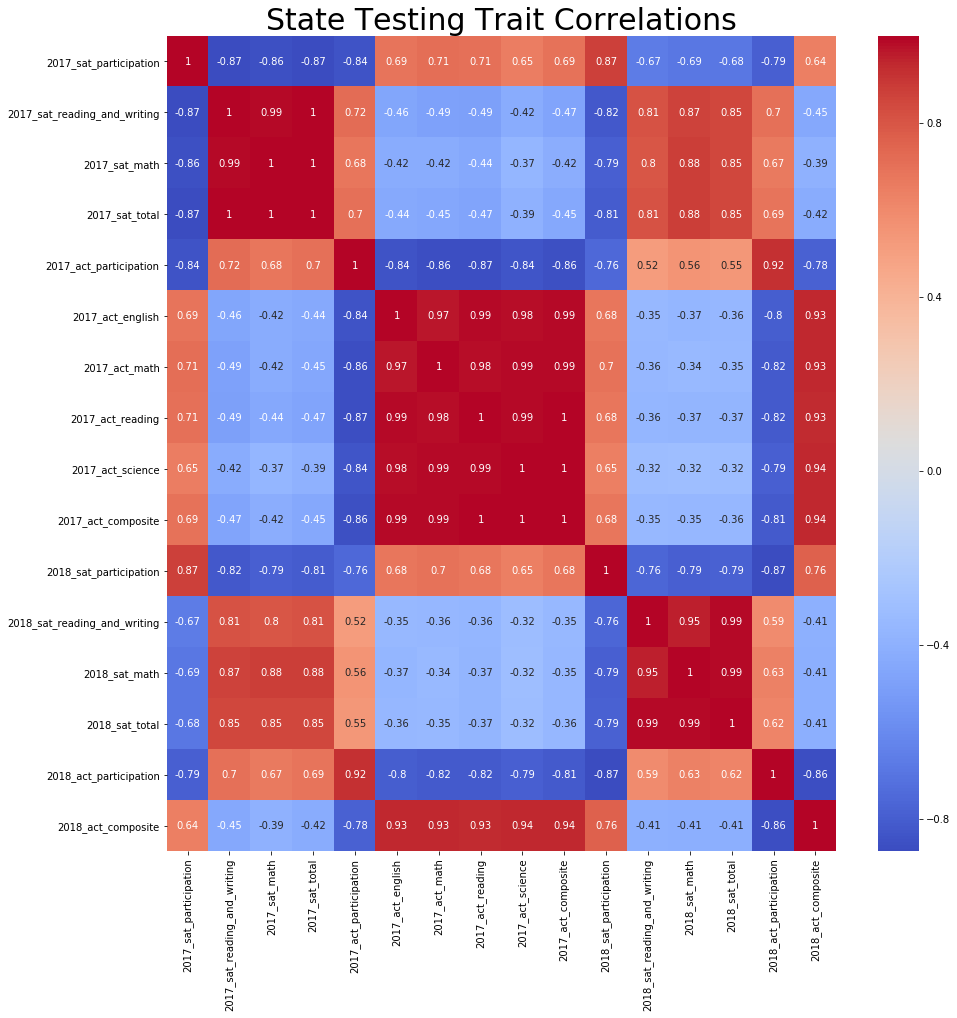

In [103]:
plt.figure(figsize = (15,15))
ax = plt.axes()
sns.heatmap(final.corr(), annot = True, cmap = 'coolwarm', ax = ax);
ax.set_title('State Testing Trait Correlations', size = 30);  #https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [104]:
dataframe = final
list_of_columns = ['2017_sat_participation', '2017_sat_reading_and_writing',
       '2017_sat_math', '2017_sat_total']
list_of_titles = ['SAT Participation in 2017', 'SAT 2017 Read & Writing', 'SAT 2017 Math', 'SAT 2017 Total']
list_of_xlabels = ['Participation Rates', 'Reading & Writing Score', 'Math Score', 'Total Score']

In [105]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (8,8))# You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        if len(list_of_columns) % 2 == 1:       #Turn off odd number of subplots
            ax[-1].axis('off')
    
    

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

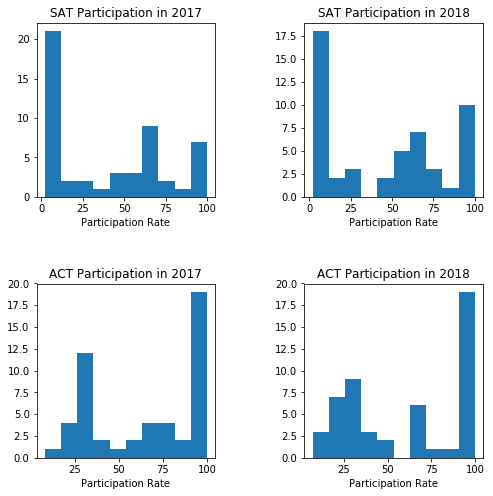

In [106]:
# The following code plots histogrms for ACT/SAT Participation rates

list_of_columns_participation = ['2017_sat_participation', '2018_sat_participation', '2017_act_participation', '2018_act_participation']
list_of_titles_participation = ['SAT Participation in 2017', 'SAT Participation in 2018', 'ACT Participation in 2017', 'ACT Participation in 2018']
list_of_xlabels_participation = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']

subplot_histograms(final, list_of_columns_participation, list_of_titles_participation, list_of_xlabels_participation)

At first glance, SAT and ACT participation rates seem to be inversely correlated which makes sense for any potential number of reasons: state rules requiring participation in one or the other, cultural rationale, network effects, history, etc.

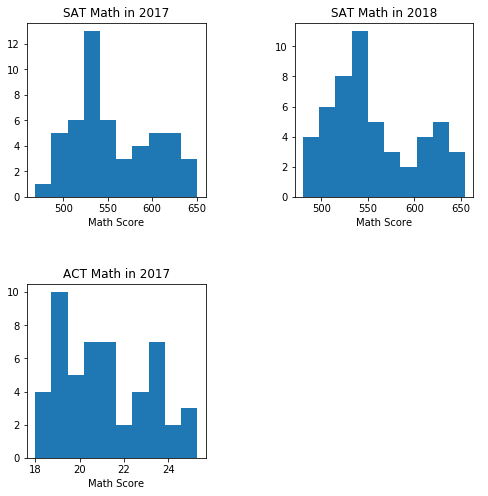

In [107]:
# The following code gives us histograms for the test math scores.

list_of_columns_math = ['2017_sat_math', '2018_sat_math', '2017_act_math']
list_of_titles_math = ['SAT Math in 2017', 'SAT Math in 2018', 'ACT Math in 2017']
list_of_xlabels_math = ['Math Score', 'Math Score', 'Math Score']

subplot_histograms(final, list_of_columns_math, list_of_titles_math, list_of_xlabels_math)

Although we only have ACT math data for 2017, we can still gather some interesting ideas.  Most notably, SAT math seems to have many occurrences around the median while ACT math data appears to be slightly more spread out.

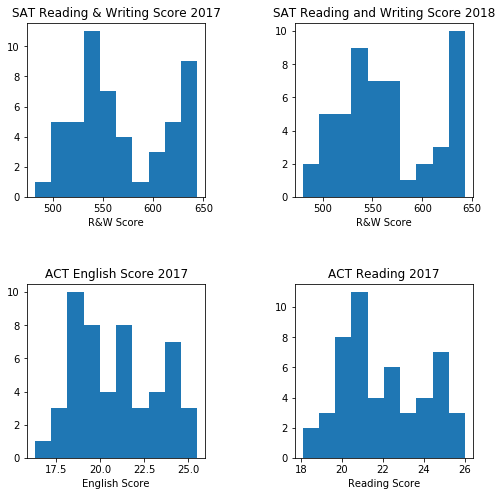

In [108]:
# The follwing code gives us histograms for english and reading scores

list_of_columns_english = ['2017_sat_reading_and_writing', '2018_sat_reading_and_writing', '2017_act_english', '2017_act_reading']
list_of_titles_english = ['SAT Reading & Writing Score 2017', 'SAT Reading and Writing Score 2018', 'ACT English Score 2017', 'ACT Reading 2017']
list_of_xlabels_english = ['R&W Score', 'R&W Score', 'English Score', 'Reading Score']

subplot_histograms(final, list_of_columns_english, list_of_titles_english, list_of_xlabels_english)

Interestingly, there appears to be slightly less of an inverse relationship between SAT and ACT scores in reading.  It is worth investigating further on if the questions are more similar across the two tests in more verbal sections than in the math based sections.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


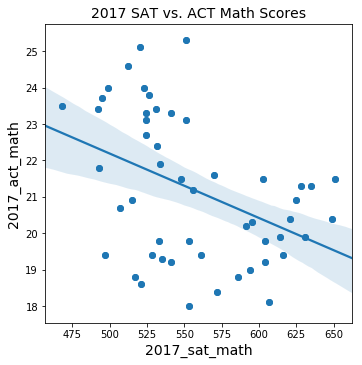

In [109]:
# The below code plots 2017 ACT math on the y axis and 2017 SAT math on the x axis.
plt.figure(figsize = (5.5,5.5));

plt.scatter(final['2017_sat_math'], 
           final['2017_act_math']);

plt.title('2017 SAT vs. ACT Math Scores',
         size = 14);

plt.xlabel('2017 SAT Math Score', size = 14);
plt.ylabel('2017 ACT Math Score', size = 14);
sns.regplot(x = '2017_sat_math', y = '2017_act_math', data = final);

Interestingly, there seems to be a negative inverse relationship between 2017 SAT Math and 2017 ACT Math.  This is worth investigating, but a likely explanation is that the scores are not totally dependent on skill but more dependent on other factors (preparation, selection bias in who is taking each test).

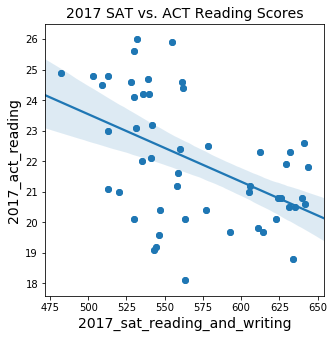

In [122]:
# The below code plots 2017 ACT Reading against 2017 SAT Reading and writing
plt.figure(figsize = (5,5));

plt.scatter(final['2017_sat_reading_and_writing'], 
           final['2017_act_reading']);

plt.title('2017 SAT vs. ACT Reading Scores',
         size = 14);

plt.xlabel('SAT Reading & Writing Score', size =14);
plt.ylabel('ACT Reading Score', size = 14);
sns.regplot(x = '2017_sat_reading_and_writing', y = '2017_act_reading', data = final);

Similar to the Math scores, we see a negative correlation.

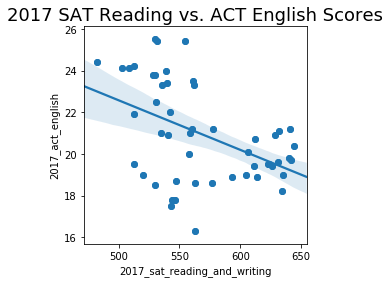

In [111]:
# The below code plots 2017 ACT English against 2017 SAT Reading and Writing
plt.figure(figsize = (4,4));

plt.scatter(final['2017_sat_reading_and_writing'], 
           final['2017_act_english']);

plt.title('2017 SAT Reading vs. ACT English Scores',
         size = 18);
sns.regplot(x = '2017_sat_reading_and_writing', y = '2017_act_english', data = final);

Similar story, as we might have expected.

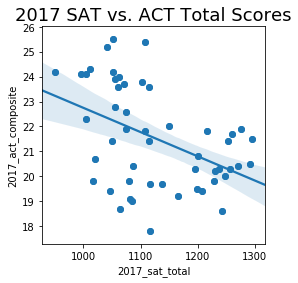

In [112]:
# The below code plots the relationship between SAT and ACT total/composite scores in 2017
plt.figure(figsize = (4,4));

plt.scatter(final['2017_sat_total'],
           final['2017_act_composite']);

plt.title('2017 SAT vs. ACT Total Scores',
         size = 18);
sns.regplot(x = '2017_sat_total', y = '2017_act_composite', data = final);

This theme has come up across various charts that we have looked at and it once again shows that there is not really a relationship between sat and act success.  This could be due to a number of factors (who's taking the test, access to the test, test requirements, etc.) that are worth examining

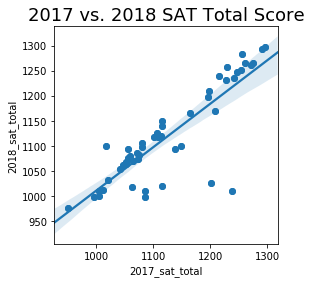

In [113]:
# The below code plots the relationship between SAT total scores in 2017 and 2018
plt.figure(figsize = (4,4));

plt.scatter(final['2017_sat_total'],
           final['2018_sat_total']);

plt.title('2017 vs. 2018 SAT Total Score',
         size = 18);
sns.regplot(x = '2017_sat_total', y = '2018_sat_total', data = final)

However, there is a very strong positive predictive relationship between SAT scores YoY.  This is another indication that score is driven by factors other than student skill.

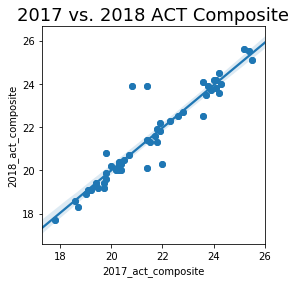

In [114]:
# The below code plots the relationship between ACT total scores in 2017 and 2018.
plt.figure(figsize = (4,4))

plt.scatter(final['2017_act_composite'],
           final['2018_act_composite']);

plt.title('2017 vs. 2018 ACT Composite',
         size = 18);
sns.regplot(x = '2017_act_composite', y = '2018_act_composite', data = final)

The relationship between ACT scores YoY seems to fit even more of an even mold.  Is it worth checking in if there was more variance in SAT participation rates than ACT participation rates YoY.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [115]:
def subplot_boxplots(dataframe):
#     nrows = int(np.ceil(len(list_of_columns)/2))  
#     fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (8,8)) 
#     plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
#     ax = ax.ravel()  
    for metric in dataframe:
        plt.figure()
        sns.boxplot(dataframe[metric])  
         

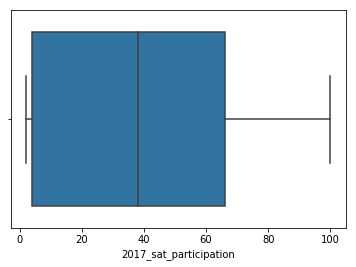

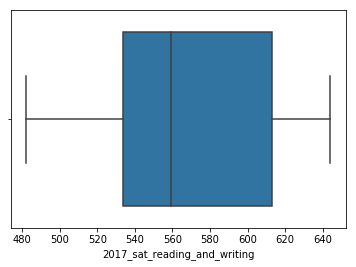

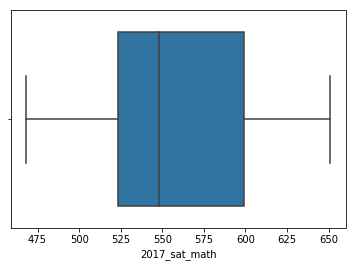

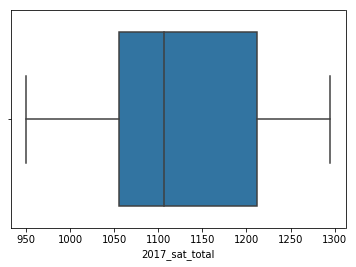

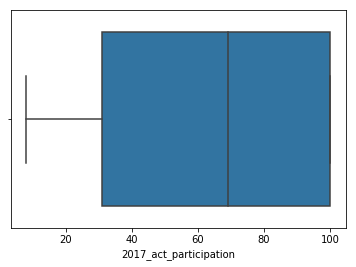

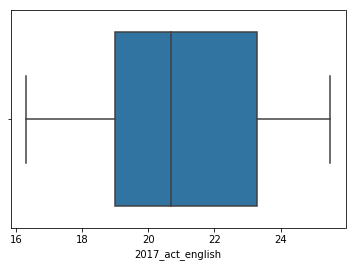

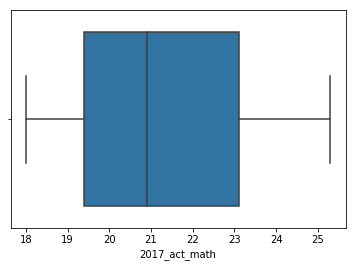

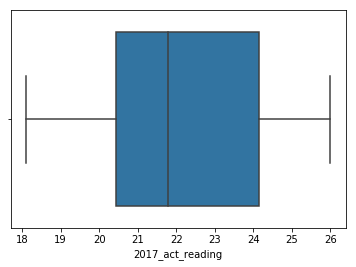

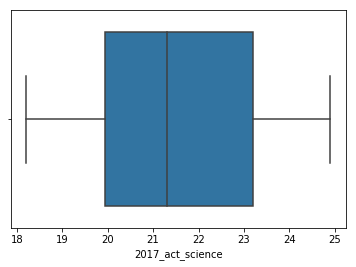

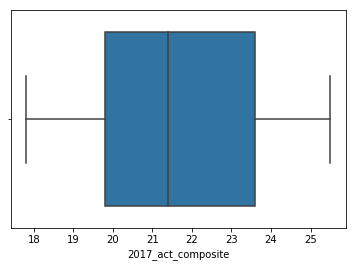

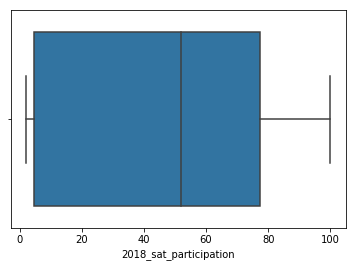

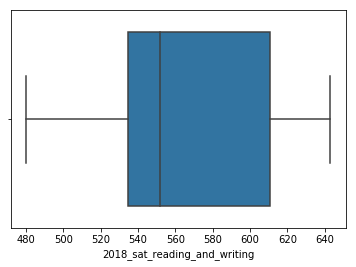

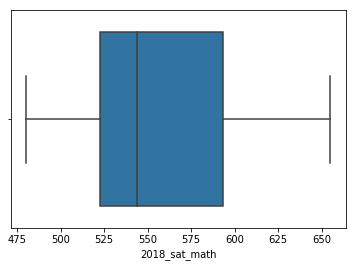

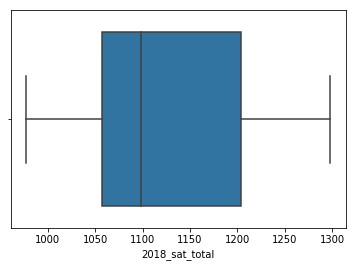

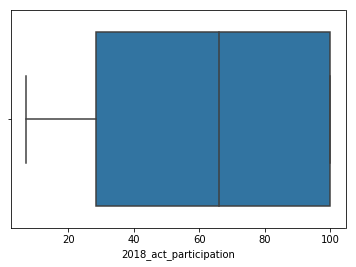

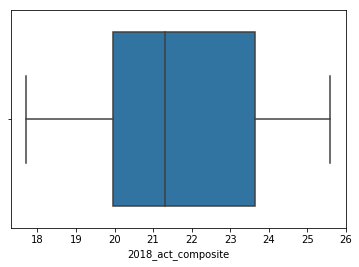

In [116]:
# The below code displays boxplots for every category in the data.  Further iterations of the boxplots will be generated below.

subplot_boxplots(final.drop(columns = ['state']))

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

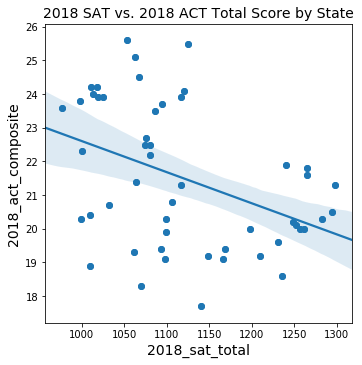

In [117]:
plt.figure(figsize = (5.5,5.5))

plt.scatter(final['2018_sat_total'],
           final['2018_act_composite']);

plt.title('2018 SAT vs. 2018 ACT Total Score by State',
         size = 14);

plt.xlabel('SAT Total Score', size = 14);
plt.ylabel('ACT Composite Score', size = 14);
sns.regplot(x = '2018_sat_total', y = '2018_act_composite', data = final);

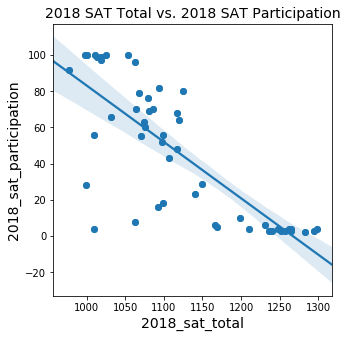

In [123]:
plt.figure(figsize = (5,5))

plt.scatter(final['2018_sat_total'],
           final['2018_sat_participation']);

plt.title('2018 SAT Total vs. 2018 SAT Participation',
         size = 14);

plt.xlabel('SAT Total Score', size = 14);
plt.ylabel('Participation Rate', size = 14);
sns.regplot(x = '2018_sat_total', y = '2018_sat_participation', data = final);

This is quite interesting and worth examining - why are the participation rates and total scores so inversely correlated.  The answer is likely due to selection - the people who choose to take the SAT in certain states are likely to be those who will do well.

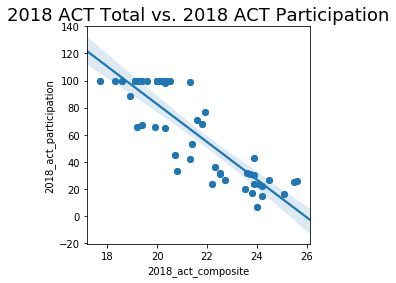

In [119]:
plt.figure(figsize = (4,4))

plt.scatter(final['2018_act_composite'],
           final['2018_act_participation']);

plt.title('2018 ACT Total vs. 2018 ACT Participation',
         size = 18);

sns.regplot(x = '2018_act_composite', y = '2018_act_participation', data = final);

We see a similar idea as above, where SAT and ACT scores are actually correlated.

Same story as the SAT, inverse correlation between score and participation.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**2017 SAT Participation:** Of the 50 states and DC, we see that the mean participation rate was at 40 and the median was 38 with an interquartile range of 62.  THere is not a normal distribution, it is actually something of the inverse of a normal distribution.

**2017 SAT Reading and Writing:**  We see a median score of 559 (out of 800) and a mean of 569.  The distribution follows a slightly more normal looking plot than the participation, with the largest concentration of scores a little below the median; however, we see a large uptick in scores towards the high end of the plot.

**2017 SAT Math:** These scores have a median of 548 and a mean of 557.  The distribution follows the same pattern as the reading and writing scores.

**2017 SAT Total:** Median is 1107 (out of 1600) with a mean of 1126.  We see the same distribution as with the subject scores.

**2017 ACT Participation:** We see a median of 69 and a mean of 65.  The plot actually follows the same pattern as SAT participation and one can reason that the states contained in each bucket are the inverse of the SAT plot.

**2017 ACT English:** We see a median of 21 and a mean of 21 as well.  The plots are slightly different than the SAT scores plots where there are three clusters of scores around each of the first three quartiles.

**2017 ACT Math:** We see a medain 21 and a mean of 21 as well with a distribution following the English scores but with a larger portion of the distribution concentrated around the first quartile.

**2017 ACT Reading:** We see a median of 22 and a mean of 22 with the distrivbution following the math distribution.

**2017 ACT Science:** We see a median and mean of 21.  The distribution has large concentrations around the first and second quartile.

**2017 ACT Composite:**  We see a median of 22 and a mean of 21 with scores clustered around the first quartile.

**2018 SAT Participation:** . We see a median of 52 and a mean of 46.  Notably, these are both increases from 2017.  

**2018 SAT Reading and Writing:** Median is 552 and the mean is 564 The distribution is somewhat normal but then has a large number of values at the high end of the range.

**2018 SAT Math:** The median is 544 with a mean of 556.  The distribution is skewed right by the high values.

**2018 SAT Total:**  The median is 1098 with a mean of 1120.  THe distribution largely follows a similar shape as the reading and writing values.

**2018 ACT Participation:** The median is 66 with a mean of 61.  We notice that the largest cluster of states is around the high end of the range (100) but the rest follows a normal distribution clusted below 50.

**2018 SAT Composite:** We see a mean of 21 and a median of 21, with no discernible shape to the distribution


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:  We do not.  We find that most of the data for each category is concentrated around the low and high ends with a soft middle

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

**Math:**  This roughly holds for math although with a slight concentration to figures below the mean.  I think this shows it is hard to make estimates given that there is not much of a patter when just looking at math scores.

**Reading**:  Similar story to math - it is hard to make estimates without looking at other pieces of data given the lack of discernible distribution.

**Participation:** It is fair to make predictions on one test if we know participation on the other given the soft middle.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:  I think not because we there is serious selection bias in the data.  As will be discussed further, we are seeing states with low participation score well on tests.  This is likely because this sample includes largely wealthier students who have access to multiple tests.  I think given this it is hard to conduct much statistical inference on the data as a whole without inputting a number of controls

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:  No.  First of all, they are negatively correlated, so the only reason to compare them is to show that the scores are not relevant to each other and that they are not necessarily indicitive of how a state performs in mathematics.  We have to keep in mind that lower participation is the key driver to high scores given who would be making up the subset of the population taking the test. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [120]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Ohio:** The state requires students to take an SAT OR an ACT and makes them free - this is crucial as it allows for high participation while also allowing students to focus on whichever test they feel more comfortable on.  Ultimately, Ohio has a participation rate of 100% on the ACT but participation on the ACT inched up 6% in 2018.  It is to be seen if scores will be positively impacted but I think this is a very interesting state to track now that students have more choice

https://www.daytondailynews.com/news/too-much-testing-some-schools-angry-with-ohio-act-sat-mandate/5lPdirdJ68IuXs1ez7Mv7L/#

**Colorado:** Colorado was interesting to look at as a state that changed emphasis from 2017 to 2018.  In 2017, SAT participation was 11%.  However, the 2018 graduation class saw a change in emphasis and had 100% of students take the SAT due to a change in law. ACT participation dropped from 100% to 30%.  Unsuprisingly, the SAT total score dropped from 1201 to 1025.  Interestingly, the average ACT composite score jumped from 20.8 to 23.9.  The change was clearly not that the students of Colorado lost their test taking ability on the SAT and improved it on the ACT: we simply saw a larger subset of students take the SAT.  

https://www.testive.com/colorado-sat-change-2017/

**Hawaii:** Interestingly, Hawaii had more than 50% participation on both the SAT and ACT in 2017 and 2018.  Hawaii had 89% participation on the ACT and 56% participation on the SAT in 2018.  One reason for this is that the ACT is free.  Another (and this goes on to my recommendation) is that prep course have long been free for both tests.  I think this is very important factor when determining how to increase participation - have students feel prepared and competitive with both.  

https://www.staradvertiser.com/2011/02/25/breaking-news/free-sat-act-prep-courses-available-online-to-hawaii-students/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Conclusions**

First and foremost, I would like to point out that while this data is helpful for uncovering some trends, to find more substantial cause and effect relationships we will need to find more substantial data sets (as I will cover later). That being said, there are some very interesting trends to look at that I believe are worth examining further.

In trying to find out a way to increase SAT Participation, the first think I wanted to see is if we should be convincing students to switch tests or simply to take a new test; as in, are students who don't take the SAT taking the ACT instead.  In looking at the states with the lowest SAT participation, we see that they all have extremely high ACT participation.  Largely speaking, these students take a test, its just not the SAT.

Next, fI watned to see if we could find a trend amongst how SAT and ACT scores are correlated with participation.  This was the most revealing portion of the exercise.  We found that average state score is (heavily) inversely correlated with participation; that is, low participation states had high average scores and high participation states had lower average scores. 

It is useful to think about why this is the case.  Intuitively, the conclusion I came to is that in states where the ACT is the norm, it is only those students who are most affluent and motivated who will seek out the SAT.  And this is where we run into our huge problem.  

For instance, I look at a state like Wisconsin, which maintains the second highest average SAT score yet only a 3% participation rate.  The takeaway here is not that students from Wisconsin are particularly bright (although that may be the case, but the point is that we don't really have data to support this claim).  Students in Wisconsin already face a high level of competition due to Wisconsin's prestigous public university system.  The last thing they need is to dip their toe into a more competitive test that may well make themn look weaker on testing compared to their peers due to the subset already taking the SAT.  

As such, my key takeaway on how to increase SAT participation is not in making the test more accessible or advertising heavier; they key is to allocate resources to free/discounted tutors and classess.  This will help close the preparation gap between wealthier/more skilled students and give students more confidence when choosing to prepare for the SAT.  Convince students that their scores can actually look good and you will see a bump in participation.  

I also chose Wisconsin as my test case due to its relatively high population density compared to its peers in the low SAT participation category.  It is constantly around the middle for the United STates in terms of population density - interestingly, rural states with lower population density tend to take the ACT.  I would want to choose a more densely populated states to capture any potential network effects - does work of the new training spread quickly?  Will it spread more amongst populous groups and areas?  I think this is a useful test case.

There are a number of areas to test as a follow up.  First off is adjusting for household income when calculation these scores.  The second is adjusting for cost of the tests - is there anything inherently different about the SAT that is minimizing participation.  Finally, doing a more formal population density analysis to see if there is anything to the idea that more densely populated areas are more likely to take one test. It seems to me this is more driven by state policy and tradition but this is certainly something worth looking at. 

http://worldpopulationreview.com/states/state-densities/